## HEART DISEASE CLASSIFICATION - SUPERVISED LEARNING

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Data Preparation and Data Exploration

In [48]:
# Read the data from the excel file
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
df.shape

(303, 14)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [51]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [52]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [53]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [54]:
df["target"].value_counts()/df.shape[0]*100

1    54.455446
0    45.544554
Name: target, dtype: float64

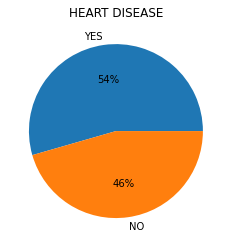

In [55]:
# Create a plot to display the percentage of the positive and negative heart disease 
labels = ['YES', 'NO']
values = df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('HEART DISEASE')
plt.show()

**Note:**

As you can see, the dataset contains 14 columns. 5 of which are numerical and 9 of them are categorical. We can only see that there is no missing values. As for balancing the data, the data is relatively balanced. 54% of the persons in the dataset have heart disease.

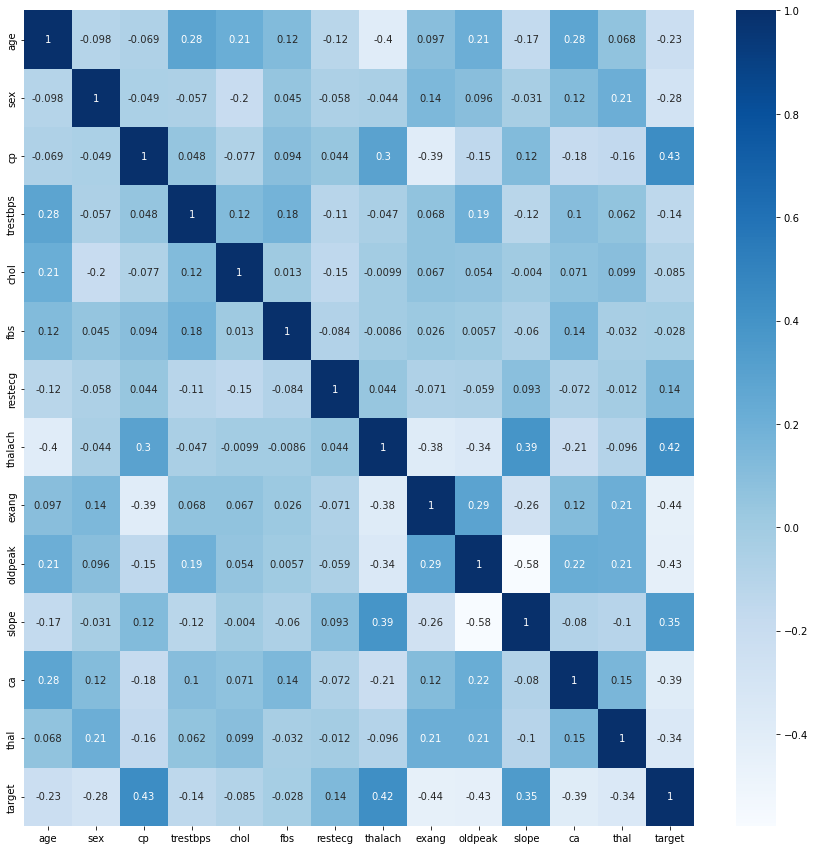

In [56]:
# Correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show()

### Age Exploration

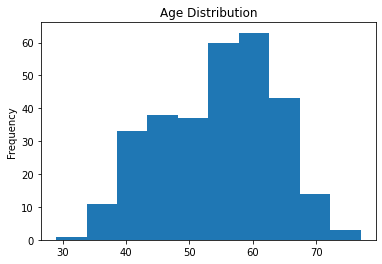

In [57]:
# Display the age distribution
df["age"].plot(kind="hist", title="Age Distribution")
plt.show()

In [58]:
# Get the min, max and average of the age
print("Minimum Age: ", min(df["age"]))
print("Miximum Age: ", max(df["age"]))
print("Average Age: ", df["age"].mean())

Minimum Age:  29
Miximum Age:  77
Average Age:  54.366336633663366


D:\Honours\heart-disease-project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Honours\heart-disease-project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


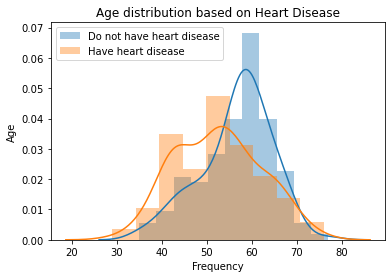

In [59]:
# Display the age distribution based on heart disease
sns.distplot(df[df["target"] == 0]["age"], label="Do not have heart disease")
sns.distplot(df[df["target"] == 1]["age"], label="Have heart disease")
plt.xlabel("Frequency")
plt.ylabel("Age")
plt.title("Age distribution based on Heart Disease")
plt.legend()
plt.show()

In [60]:
# Get the min, max and average of the age of the people who do not have heart disease
print("Minimum age of people who do not have heart disease: ", min(df[df["target"] == 0]["age"]))
print("Maximum age of people who do not have heart disease: ", max(df[df["target"] == 0]["age"]))
print("Average age of people who do not have heart disease: ",    df[df["target"] == 0]["age"].mean())

Minimum age of people who do not have heart disease:  35
Maximum age of people who do not have heart disease:  77
Average age of people who do not have heart disease:  56.60144927536232


In [61]:
# Get the min, max and average of the age of the people who have heart disease
print("Minimum age of people have heart disease: ", min(df[df["target"] == 1]["age"]))
print("Maximum age of people have heart disease: ", max(df[df["target"] == 1]["age"]))
print("Average age of people have heart disease: ",    df[df["target"] == 1]["age"].mean())

Minimum age of people have heart disease:  29
Maximum age of people have heart disease:  76
Average age of people have heart disease:  52.4969696969697


### Gender Exploration

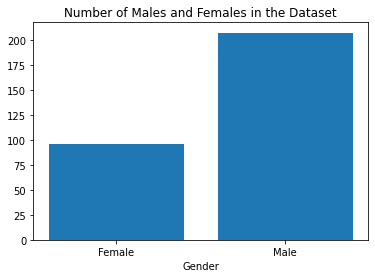

In [62]:
# Number of males and females
F = df[df["sex"] == 0].count()["target"]
M = df[df["sex"] == 1].count()["target"]

# Creating the plot
figure, ax = plt.subplots(figsize =(6, 4))
ax.bar(x = ["Female", "Male"], height =[F, M])
plt.xlabel("Gender")
plt.title("Number of Males and Females in the Dataset")
plt.show()

### Chest Pain Type Exploration

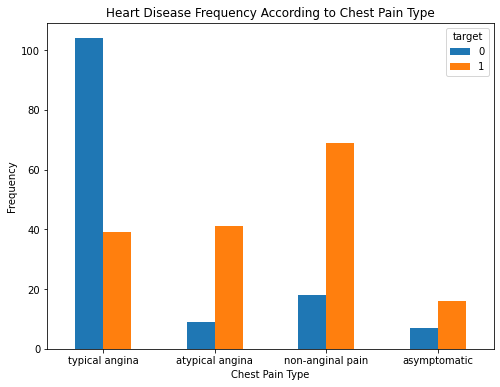

In [63]:
# Display chest pain types based on the target
pd.crosstab(df.cp,df.target).plot(kind="bar", figsize=(8, 6))
plt.title("Heart Disease Frequency According to Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel("Frequency")
plt.show()

**Note:**

We can see that most of the people with heart disease have typical angina

### Blood Pressure Exploration

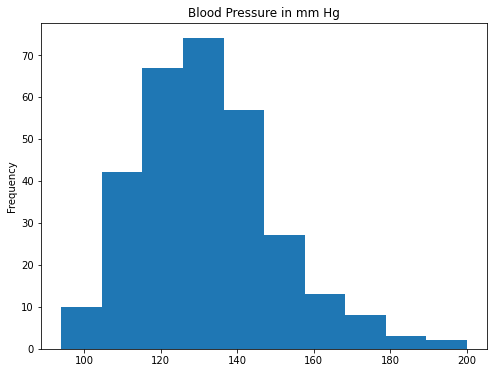

In [64]:
# Display blood pressure distribution
df["trestbps"].plot(kind="hist", title="Blood Pressure in mm Hg", figsize=(8, 6))
plt.show()

D:\Honours\heart-disease-project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Honours\heart-disease-project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


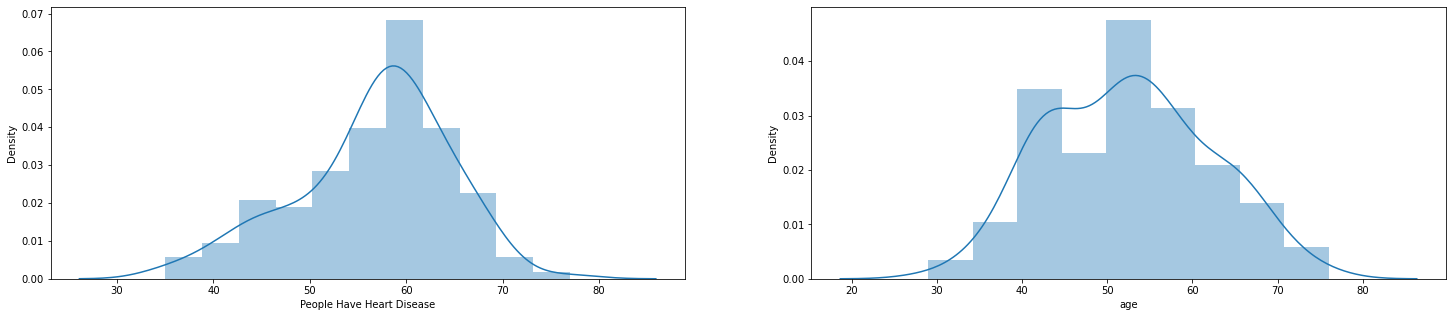

In [65]:
# Display the blood pressure distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))

ax = sns.distplot(df[df["target"] == 0]["age"], label="Do not have heart disease", ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')

sns.distplot(df[df["target"] == 1]["age"], label="Have heart disease")
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [66]:
# Get the min, max and average of the blood pressure of the people who do not have heart disease
print("Minimum age of people who do not have heart disease: ", min(df[df["target"] == 0]["trestbps"]))
print("Maximum age of people who do not have heart disease: ", max(df[df["target"] == 0]["trestbps"]))
print("Average age of people who do not have heart disease: ",    df[df["target"] == 0]["trestbps"].mean())

Minimum age of people who do not have heart disease:  100
Maximum age of people who do not have heart disease:  200
Average age of people who do not have heart disease:  134.3985507246377


In [67]:
# Get the min, max and average of the blood pressure of the people who have heart disease
print("Minimum age of people who have heart disease: ", min(df[df["target"] == 1]["trestbps"]))
print("Maximum age of people who have heart disease: ", max(df[df["target"] == 1]["trestbps"]))
print("Average age of people who have heart disease: ",    df[df["target"] == 1]["trestbps"].mean())

Minimum age of people who have heart disease:  94
Maximum age of people who have heart disease:  180
Average age of people who have heart disease:  129.3030303030303


### Cholestrol Exploration

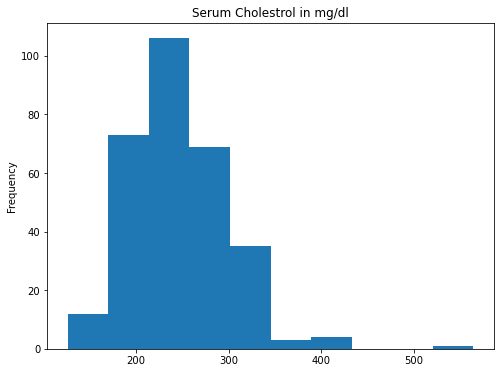

In [68]:
# Display Cholestrol Distribution
df["chol"].plot(kind="hist", title="Serum Cholestrol in mg/dl", figsize=(8,6))
plt.show()

D:\Honours\heart-disease-project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Honours\heart-disease-project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


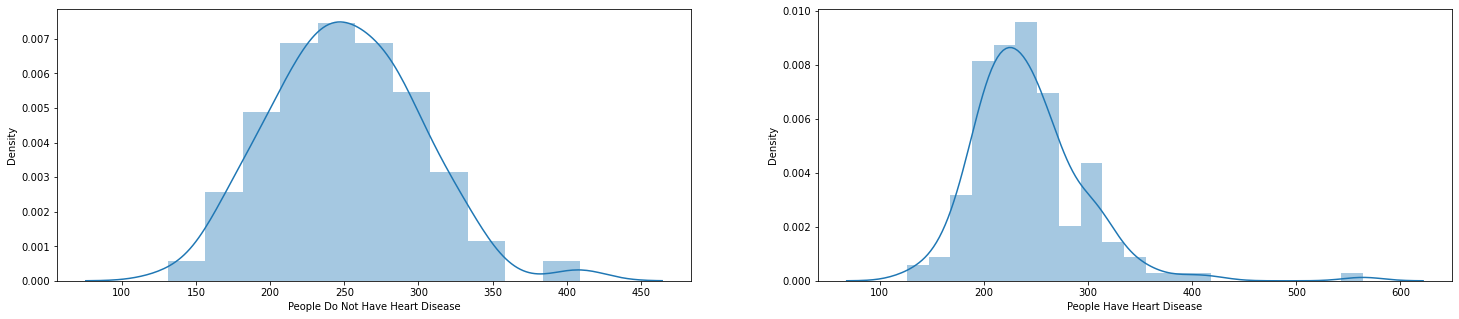

In [69]:
# Display Cholestoral distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 0]['chol'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 1]['chol'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [70]:
# Get the min, max and average of the cholestrol of the people who do not have heart disease
print("Minimum age of people who do not have heart disease: ", min(df[df["target"] == 0]["chol"]))
print("Maximum age of people who do not have heart disease: ", max(df[df["target"] == 0]["chol"]))
print("Average age of people who do not have heart disease: ",     df[df["target"] == 0]["chol"].mean())

Minimum age of people who do not have heart disease:  131
Maximum age of people who do not have heart disease:  409
Average age of people who do not have heart disease:  251.08695652173913


In [71]:
# Get the min, max and average of the cholestrol of the people who do not have heart disease
print("Minimum age of people who have heart disease: ", min(df[df["target"] == 1]["chol"]))
print("Maximum age of people who have heart disease: ", max(df[df["target"] == 1]["chol"]))
print("Average age of people who have heart disease: ",     df[df["target"] == 1]["chol"].mean())

Minimum age of people who have heart disease:  126
Maximum age of people who have heart disease:  564
Average age of people who have heart disease:  242.23030303030302


### Fasting Blood Sugar Exploration

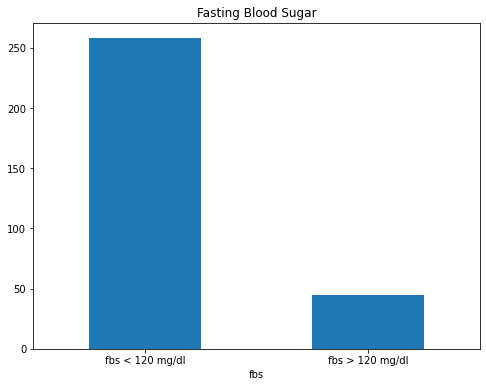

In [72]:
# Display fasting blood sugar in bar chart
df.groupby(df['fbs']).count()['target'].plot(kind = 'bar', title = 'Fasting Blood Sugar', figsize = (8, 6))
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.show()

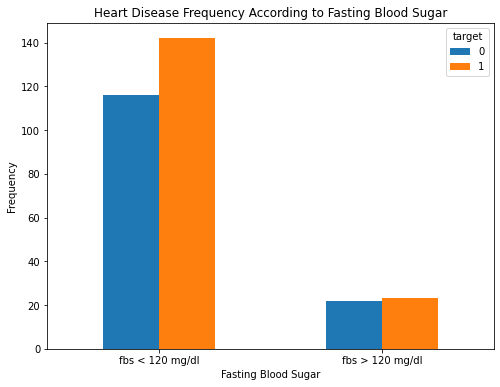

In [73]:
# Display fasting blood sugar based on the target
pd.crosstab(df.fbs, df.target).plot(kind="bar", figsize=(8, 6))
plt.title("Heart Disease Frequency According to Fasting Blood Sugar")
plt.xlabel("Fasting Blood Sugar")
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

### Electrocardiographic Results Exploration

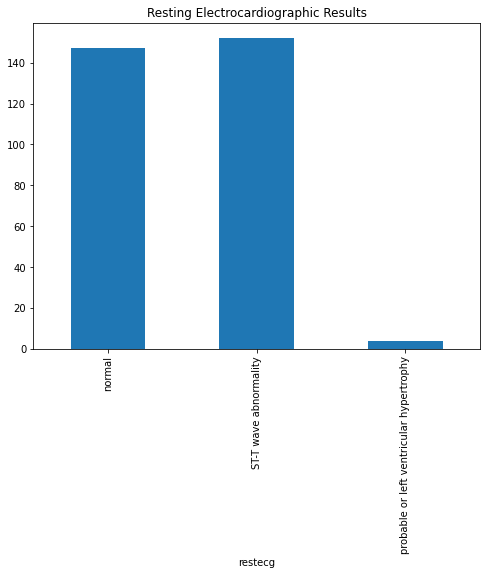

In [74]:
# Display electrocardiographic results in bar chart
df.groupby(df['restecg']).count()['target'].plot(kind = 'bar', title = 'Resting Electrocardiographic Results', figsize = (8, 6))
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.show()

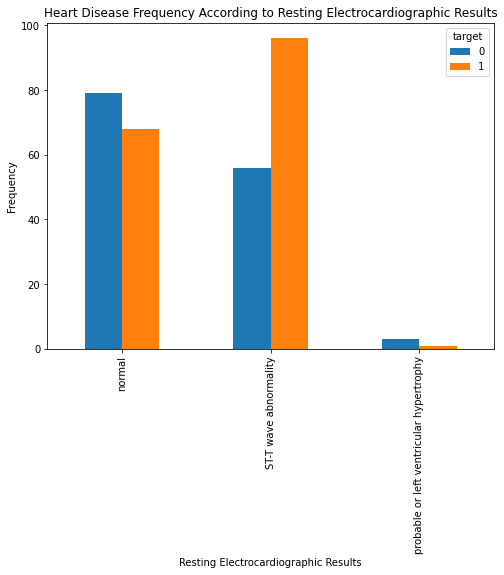

In [75]:
# Display resting electrocardiographic results based on the target
pd.crosstab(df.restecg,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()

### Maximum Heart Rate Exploration

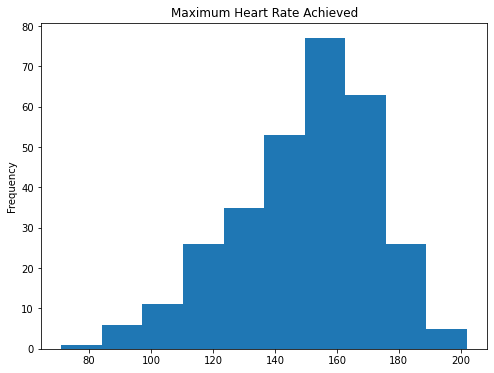

In [76]:
# Display the maximum heart rate distribution
df["thalach"].plot(kind="hist", title="Maximum Heart Rate Achieved", figsize=(8, 6))
plt.show()

D:\Honours\heart-disease-project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Honours\heart-disease-project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


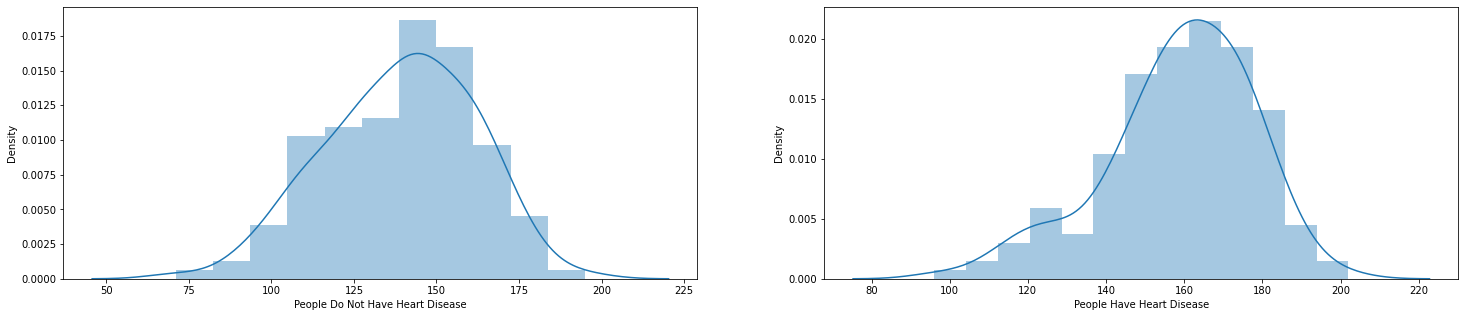

In [77]:
# Display maximum heart rate distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 0]['thalach'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 1]['thalach'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

In [78]:
# Get the min, max and average of the maximum heart rate of the people who do not have heart disease
print("Minimum age of people who do not have heart disease: ", min(df[df["target"] == 0]["thalach"]))
print("Maximum age of people who do not have heart disease: ", max(df[df["target"] == 0]["thalach"]))
print("Average age of people who do not have heart disease: ",     df[df["target"] == 0]["thalach"].mean())

Minimum age of people who do not have heart disease:  71
Maximum age of people who do not have heart disease:  195
Average age of people who do not have heart disease:  139.1014492753623


In [79]:
# Get the min, max and average of the maximum heart rate of the people who have heart disease
print("Minimum age of people have heart disease: ", min(df[df["target"] == 1]["thalach"]))
print("Maximum age of people have heart disease: ", max(df[df["target"] == 1]["thalach"]))
print("Average age of people have heart disease: ",     df[df["target"] == 1]["thalach"].mean())

Minimum age of people have heart disease:  96
Maximum age of people have heart disease:  202
Average age of people have heart disease:  158.46666666666667


### Exercise Induced Angina Exploration

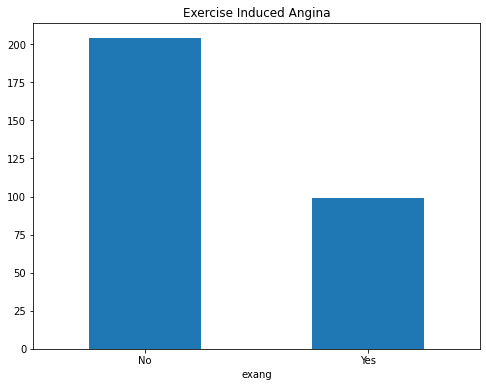

In [80]:
# Display exercise induced angina in bar chart
df.groupby(df['exang']).count()['target'].plot(kind = 'bar', title = 'Exercise Induced Angina',  figsize = (8, 6))
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.show()

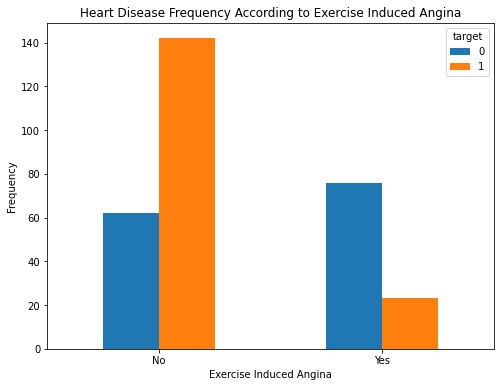

In [81]:
# Display exercise induced angina based on the target
pd.crosstab(df.exang,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

### ST Depression Exploration

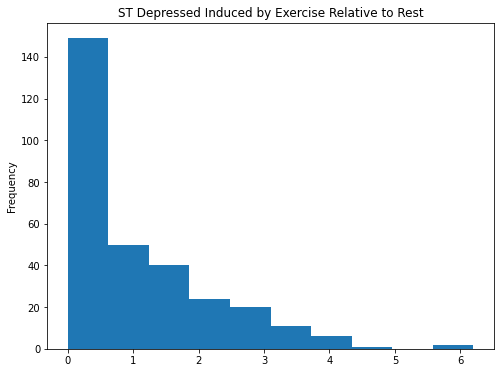

In [82]:
# Display ST depression induced by exercise relative to rest distribution
df["oldpeak"].plot(kind="hist", title = "ST Depressed Induced by Exercise Relative to Rest", figsize=(8, 6))
plt.show()

D:\Honours\heart-disease-project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Honours\heart-disease-project\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


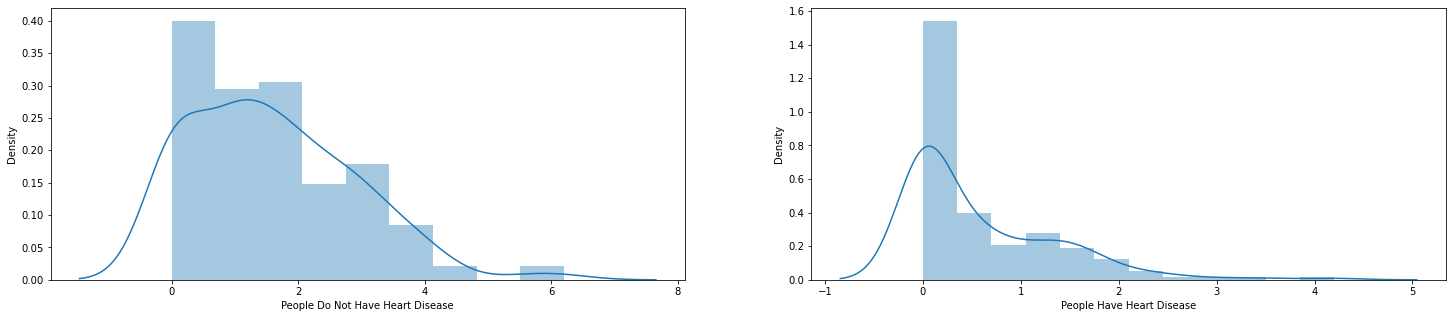

In [83]:
# Display ST depression distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 0]['oldpeak'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 1]['oldpeak'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

In [84]:
# Get min, max and average of the ST depression  of the people have heart diseas
print('Min ST depression of people who do not have heart disease: ', min(df[df['target'] == 0]['oldpeak']))
print('Max ST depression of people who do not have heart disease: ', max(df[df['target'] == 0]['oldpeak']))
print('Average ST depression of people who do not have heart disease: ', df[df['target'] == 0]['oldpeak'].mean())

Min ST depression of people who do not have heart disease:  0.0
Max ST depression of people who do not have heart disease:  6.2
Average ST depression of people who do not have heart disease:  1.5855072463768118


In [85]:
# Get min, max and average of the ST depression of the people have heart diseas
print('Min ST depression of people who have heart disease: ', min(df[df['target'] == 1]['oldpeak']))
print('Max ST depression of people who have heart disease: ', max(df[df['target'] == 1]['oldpeak']))
print('Average ST depression of people not have heart disease: ', df[df['target'] == 1]['oldpeak'].mean())

Min ST depression of people who have heart disease:  0.0
Max ST depression of people who have heart disease:  4.2
Average ST depression of people not have heart disease:  0.5830303030303029


### Slope Exploration

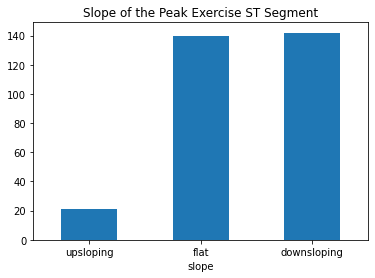

In [86]:
# Display the slope of the peak exercise ST segment in a bar chart
df.groupby(df["slope"]).count()["target"].plot(kind = "bar", title="Slope of the Peak Exercise ST Segment")
plt.xticks(np.arange(3), ("upsloping", "flat", "downsloping"), rotation = 0)
plt.show()

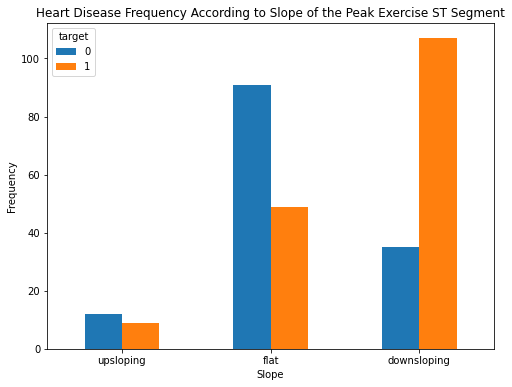

In [87]:
# Display slope of the peak exercise ST segment based on the target
pd.crosstab(df.slope, df.target).plot(kind="bar", figsize=(8, 6))
plt.title("Heart Disease Frequency According to Slope of the Peak Exercise ST Segment")
plt.xlabel("Slope")
plt.xticks(np.arange(3), ("upsloping", "flat", "downsloping"), rotation = 0)
plt.ylabel("Frequency")
plt.show()

### Major Vessels Exploration

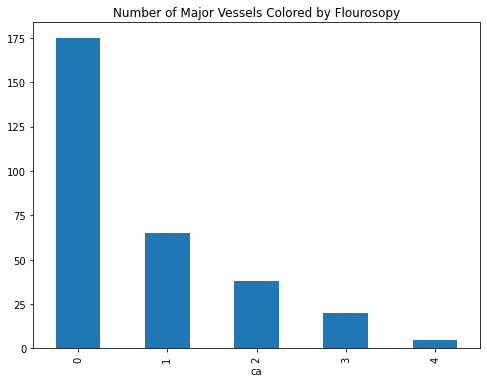

In [88]:
# Display number of major vessels in bar chart
df.groupby(df['ca']).count()['target'].plot(kind = 'bar', title = 'Number of Major Vessels Colored by Flourosopy', figsize = (8, 6))
plt.show()

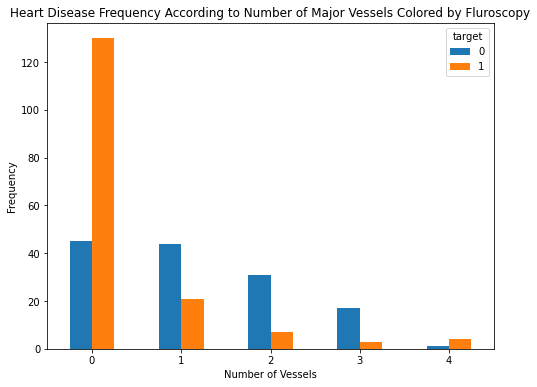

In [89]:
# Display number of vessels based on the target
pd.crosstab(df.ca, df.target).plot(kind="bar", figsize=(8, 6))
plt.title("Heart Disease Frequency According to Number of Major Vessels Colored by Fluroscopy")
plt.xlabel("Number of Vessels")
plt.xticks(rotation=0)
plt.ylabel("Frequency")
plt.show()

### Thalassemia Exploration

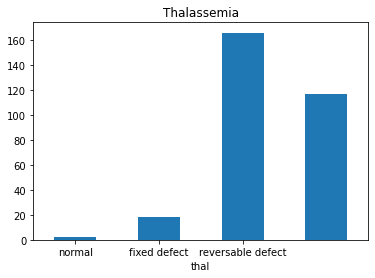

In [96]:
# Display thalassemia in bar chart
df.groupby(df['thal']).count()['target'].plot(kind = 'bar', title = 'Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversable defect'), rotation = 0)
plt.show()

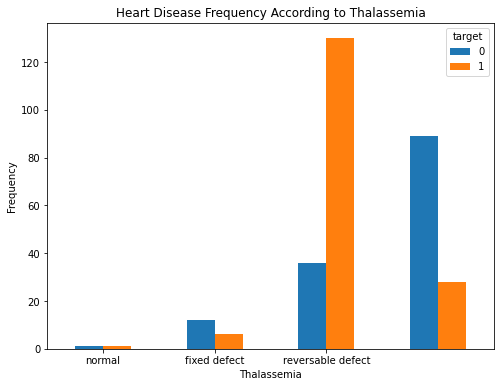

In [95]:
pd.crosstab(df.thal, df.target).plot(kind="bar", figsize=(8, 6))
plt.title("Heart Disease Frequency According to Thalassemia")
plt.xlabel("Thalassemia")
plt.xticks(np.arange(3), ("normal", "fixed defect", "reversable defect"), rotation = 0)
plt.ylabel("Frequency")
plt.show()

### The corrolation between heart disease, cp and exang

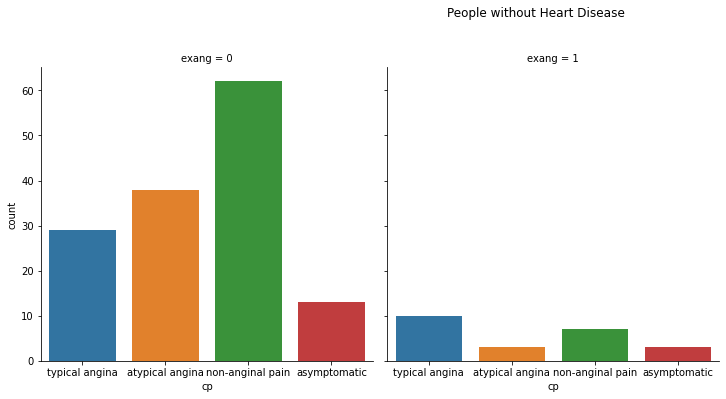

In [98]:
g = sns.factorplot("cp", col = "exang", col_wrap = 3, data = df[df['target'] == 1], kind = "count")
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
g.fig.suptitle('People without Heart Disease', y = 1.1)
plt.show()

### The corrolation between oldpeak, slope and target